# Терапия при анорексии

В исследовании оценивается эффективность поведенческой терапии для лечения анорексии. Для 50 пациентов известен вес до начала терапии и по её окончании. Была ли терапия эффективной?

In [6]:
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as st
import seaborn as sns

In [4]:
# бутстрап
from arch.bootstrap import IIDBootstrap

# критерий знаков
from statsmodels.stats.descriptivestats import sign_test

# перестановочный критерий
from permute.core import one_sample

In [7]:
w = np.loadtxt('./weight.txt', delimiter='\t', skiprows=1)

In [27]:
len(w)

29

Text(0, 0.5, 'After')

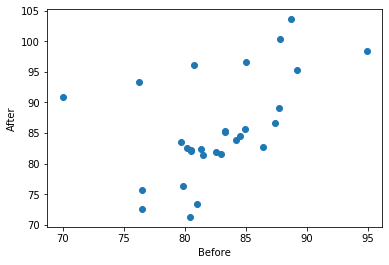

In [8]:
plt.scatter(w[:,0], w[:,1])
plt.xlabel('Before')
plt.ylabel('After')


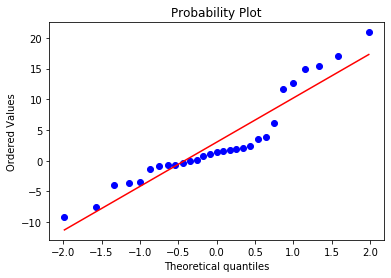

In [9]:
_=st.probplot(w[:,1]-w[:,0], plot=plt)

Шапиро (```st.shapiro```):

In [21]:
st.shapiro(w[:,1] - w[:,0])

(0.8961783647537231, 0.007945157587528229)

Критерий знаков (```sign_test```):

In [22]:
sign_test(w[:,1] - w[:,0])

(3.5, 0.26493089646101)

Уилкоксон (```st.wilcoxon```):

In [23]:
st.wilcoxon(w[:,1] - w[:,0])

WilcoxonResult(statistic=131.5, pvalue=0.06291972262602667)

In [24]:
st.wilcoxon(w[:,1] - w[:,0])

WilcoxonResult(statistic=131.5, pvalue=0.06291972262602667)

Перестановочный критерий (```one_sample```):

In [25]:
one_sample(w[:,1], w[:,0],  alternative='two-sided')

ValueError: high is out of bounds for int32

Доверительный интервал для среднего прироста веса с помощью бутстрепа:

In [26]:
bs = IIDBootstrap(w[:,1]- w[:,0])
print(bs.conf_int(np.mean, 1000, method='bca'))

[[0.76481266]
 [6.01926786]]


Доверительный интервал для медианы прироста веса:

In [28]:
bs = IIDBootstrap(w[:,1]- w[:,0])
print(bs.conf_int(np.median, 1000, method='bca'))

[[-0.7]
 [ 2.1]]


почему так?

**Everitt N., McMahon M. (2004). Nutrition and the surgical patient. In Consensus in Clinical Nutrition, Cambridge: Cambridge University Press.**